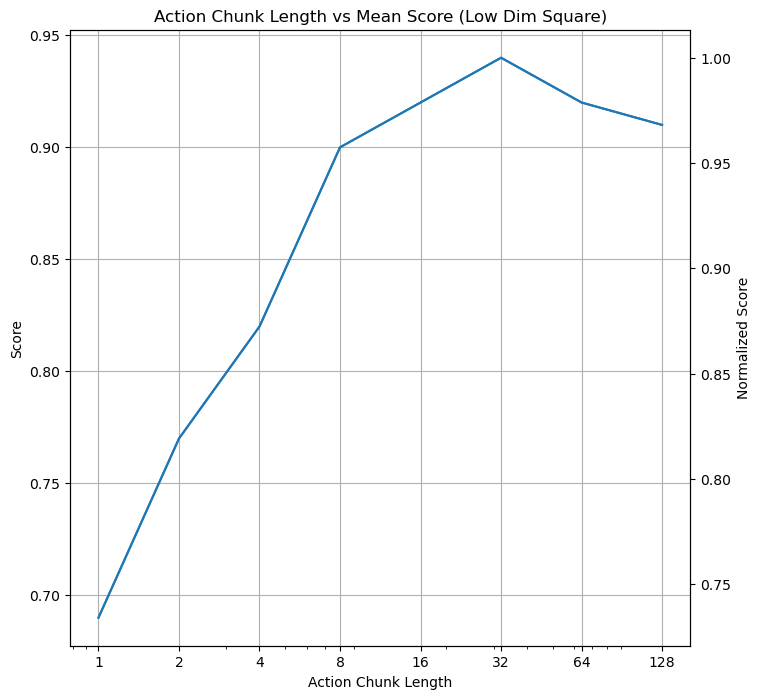

In [3]:
import matplotlib.pyplot as plt

# Example y values
y = [0.69, 0.77, 0.82, 0.90, 0.92, 0.94, 0.92, 0.91]
y_ratio = [val/max(y) for val in y]

# Create x values
x = [1, 2, 4, 8, 16, 32, 64, 128]

# Create the plot
fig, ax1 = plt.subplots(figsize=(8,8))
# Plot on primary y-axis
ax1.plot(x, y)
ax1.set_xscale('log')
ax1.set_xticks(x)
ax1.set_xticklabels(x)
ax1.set_xlabel('Action Chunk Length')
ax1.set_ylabel('Score', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create secondary y-axis and plot
ax2 = ax1.twinx()
ax2.plot(x, y_ratio, "tab:blue")
ax2.set_ylabel('Normalized Score', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add grid and title
ax1.grid(True)
plt.title('Action Chunk Length vs Mean Score (Low Dim Square)')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Example data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Create simple line plot
plt.figure()
plt.plot(x, y)
plt.xlabel('X axis')
plt.ylabel('Y axis') 
plt.title('Simple Line Plot')
plt.grid(True)
plt.show()

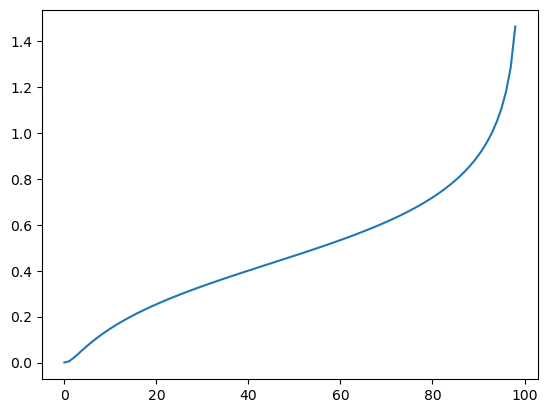

In [3]:
import numpy as np

from matplotlib import pyplot as plt

kl_div = np.load("kl.npy")
plt.plot(kl_div)
plt.show()

In [5]:
print(kl_div.mean()/np.log(2))

0.7069149943580512


In [14]:
from diffusers import DDPMScheduler
import torch

scheduler = DDPMScheduler(num_train_timesteps=100)

scheduler.set_timesteps(100)
betas = scheduler.betas
alphas = scheduler.alphas
alphas_cumprod = scheduler.alphas_cumprod
alphas_cumprod_prev = torch.cat([torch.ones(1), alphas_cumprod[:-1]])

print(betas)
print(alphas)
print(alphas_cumprod)
print(alphas_cumprod_prev)

print((torch.sqrt(alphas_cumprod)*betas/(1-alphas_cumprod))**2)

tensor([1.0000e-04, 3.0101e-04, 5.0202e-04, 7.0303e-04, 9.0404e-04, 1.1051e-03,
        1.3061e-03, 1.5071e-03, 1.7081e-03, 1.9091e-03, 2.1101e-03, 2.3111e-03,
        2.5121e-03, 2.7131e-03, 2.9141e-03, 3.1152e-03, 3.3162e-03, 3.5172e-03,
        3.7182e-03, 3.9192e-03, 4.1202e-03, 4.3212e-03, 4.5222e-03, 4.7232e-03,
        4.9242e-03, 5.1253e-03, 5.3263e-03, 5.5273e-03, 5.7283e-03, 5.9293e-03,
        6.1303e-03, 6.3313e-03, 6.5323e-03, 6.7333e-03, 6.9343e-03, 7.1354e-03,
        7.3364e-03, 7.5374e-03, 7.7384e-03, 7.9394e-03, 8.1404e-03, 8.3414e-03,
        8.5424e-03, 8.7434e-03, 8.9444e-03, 9.1455e-03, 9.3465e-03, 9.5475e-03,
        9.7485e-03, 9.9495e-03, 1.0151e-02, 1.0352e-02, 1.0553e-02, 1.0754e-02,
        1.0955e-02, 1.1156e-02, 1.1357e-02, 1.1558e-02, 1.1759e-02, 1.1960e-02,
        1.2161e-02, 1.2362e-02, 1.2563e-02, 1.2764e-02, 1.2965e-02, 1.3166e-02,
        1.3367e-02, 1.3568e-02, 1.3769e-02, 1.3970e-02, 1.4171e-02, 1.4372e-02,
        1.4573e-02, 1.4774e-02, 1.4975e-

In [17]:
a = (torch.sqrt(alphas_cumprod)*betas/(1-alphas_cumprod))**2
gamma = (1-alphas_cumprod_prev)*betas/(1-alphas_cumprod)
print(gamma)
print(a/gamma)

tensor([0.0000e+00, 7.5085e-05, 2.2295e-04, 3.9541e-04, 5.7866e-04, 7.6763e-04,
        9.6001e-04, 1.1546e-03, 1.3506e-03, 1.5477e-03, 1.7455e-03, 1.9440e-03,
        2.1430e-03, 2.3423e-03, 2.5420e-03, 2.7419e-03, 2.9421e-03, 3.1425e-03,
        3.3430e-03, 3.5437e-03, 3.7445e-03, 3.9455e-03, 4.1465e-03, 4.3477e-03,
        4.5489e-03, 4.7503e-03, 4.9517e-03, 5.1532e-03, 5.3548e-03, 5.5564e-03,
        5.7582e-03, 5.9599e-03, 6.1618e-03, 6.3637e-03, 6.5656e-03, 6.7676e-03,
        6.9697e-03, 7.1718e-03, 7.3740e-03, 7.5762e-03, 7.7785e-03, 7.9808e-03,
        8.1831e-03, 8.3855e-03, 8.5879e-03, 8.7904e-03, 8.9930e-03, 9.1955e-03,
        9.3981e-03, 9.6007e-03, 9.8034e-03, 1.0006e-02, 1.0209e-02, 1.0412e-02,
        1.0614e-02, 1.0817e-02, 1.1020e-02, 1.1223e-02, 1.1426e-02, 1.1629e-02,
        1.1832e-02, 1.2035e-02, 1.2238e-02, 1.2441e-02, 1.2644e-02, 1.2848e-02,
        1.3051e-02, 1.3254e-02, 1.3457e-02, 1.3661e-02, 1.3864e-02, 1.4067e-02,
        1.4270e-02, 1.4474e-02, 1.4677e-